# Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2 as cv

# Load the Cifar-10 dataset

In [2]:
#categories of classes
train_dir=r"C:\Users\my pc\OneDrive - American International University-Bangladesh\American International University-Bangladesh\Computer Vision Tasks\CIFAR-10-images\train"
categories=os.listdir(train_dir)
print(categories)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
#Train data
train_data=[]
for i in categories:
    path=os.path.join(train_dir,i)
    classes=categories.index(i)
    for img in tqdm(os.listdir(path)):
        img_array=cv.imread(os.path.join(path,img))
        train_data.append([img_array,classes])
print(len(train_data))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 10224.94it/s]

50000


# Converting into grayscale

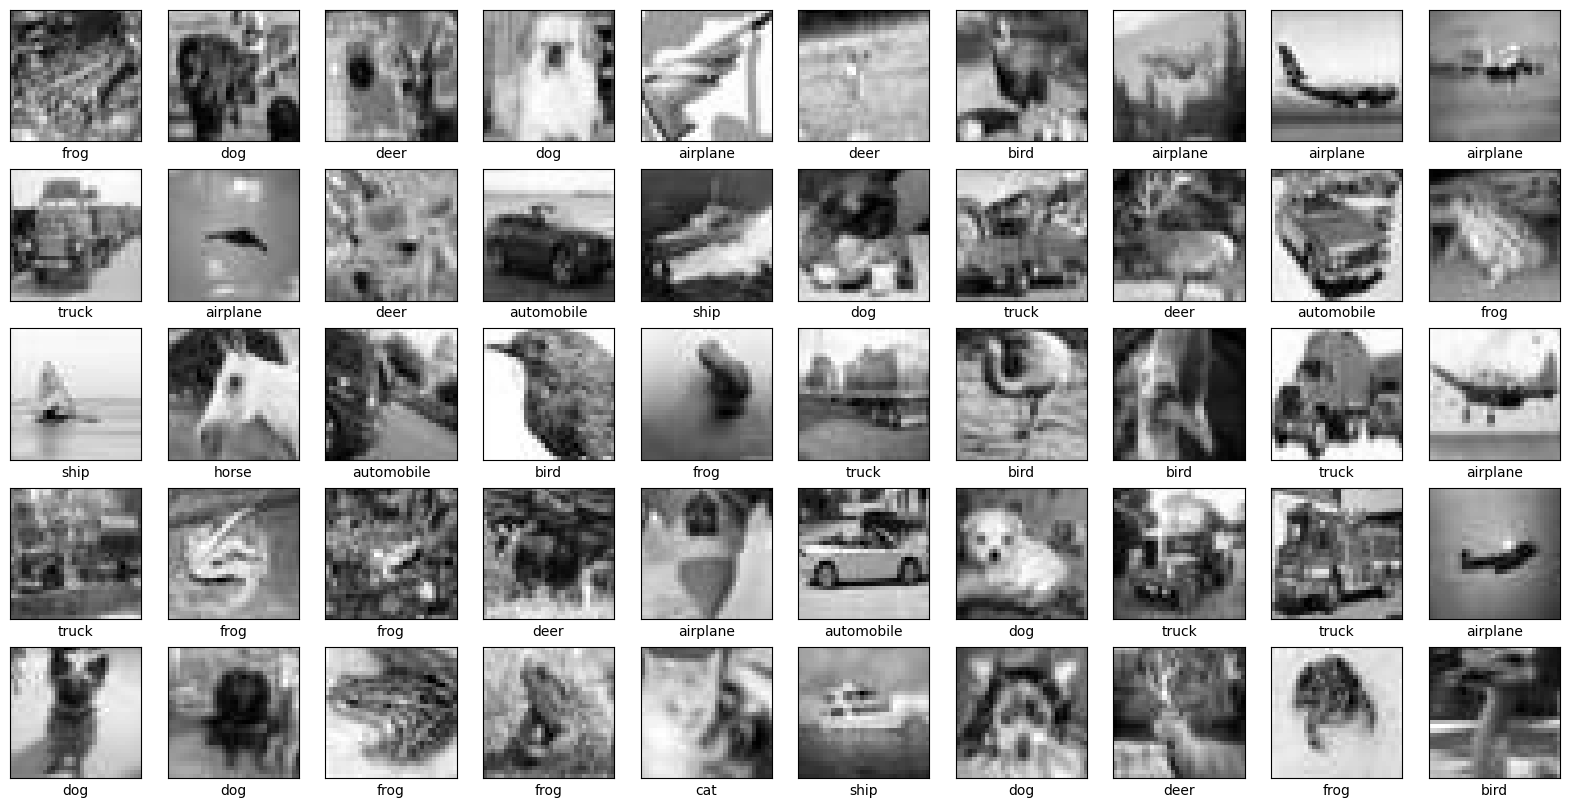

In [4]:
random.shuffle(train_data)
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    image=train_data[i][0]
    image_grayscale=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    plt.imshow(image_grayscale,cmap='gray')
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

# Model training and evaluation

In [5]:
fold_0=train_data[0:1500]
fold_1=train_data[1500:3000]
fold_2=train_data[3000:4500]
fold_3=train_data[4500:6000]
fold_4=train_data[6000:7500]

In [22]:
k_max=30

def l1_dist(x,y):
    return np.sum(np.abs(x-y))
def l2_dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [ ]:
# mean_accuracy_l1=[]
mean_accuracy_l2=[]
sd_accuracy_l1=[]
sd_accuracy_l2=[]

for class_idx,class_name in enumerate(categories):
    class_fold_accuracy_l1=[]
    class_fold_accuracy_l2=[]
    
    for fold in tqdm(range(5)):
        fold_accuracy_l1=[]
        fold_accuracy_l2=[]
        
        if fold==0:
            train=fold_1+fold_2+fold_3+fold_4
            validation=fold_0
        elif fold==1:
            train=fold_0+fold_2+fold_3+fold_4
            validation=fold_1
        elif fold==2:
            train=fold_0+fold_1+fold_3+fold_4
            validation=fold_2
        elif fold==3:
            rain=fold_0+fold_1+fold_2+fold_4
            validation=fold_3
        elif fold==4:
            rain=fold_0+fold_1+fold_2+fold_3
            validation=fold_4
        accuracy_l1=0
        accuracy_l2=0
        
        for v in validation:
            l1_distance=[]
            l2_distance=[]
            
            for t in train:
                l1=l1_dist(v[0],t[0])
                l2=l2_dist(v[0],t[0])
                l1_distance.append((l1,t[1]))
                l2_distance.append((l2,t[1]))
            l1_distance.sort(key=lambda x:x[0])
            l2_distance.sort(key=lambda x:x[0])
            
            l1_neighbors=[d[1] for d in l1_distance[:k_max]]
            counts_l1=np.bincount(l1_neighbors)
            l1_pred=np.argmax(counts_l1)
            
            l2_neighbors=[d[1] for d in l1_distance[:k_max]]
            counts_l2=np.bincount(l2_neighbors)
            l2_pred=np.argmax(counts_l2)
            
            if l1_pred==v[1]:
                accuracy_l1+=1
            if l2_pred==v[1]:
                accuracy_l2+=1
        fold_accuracy_l1.append(accuracy_l1/len(validation))
        fold_accuracy_l2.append(accuracy_l2/len(validation))
    mean_accuracy_l1.append(np.mean(fold_accuracy_l1))
    mean_accuracy_l2.append(np.mean(fold_accuracy_l2))
    sd_accuracy_l1.append(np.std(fold_accuracy_l1))
    sd_accuracy_l2.append(np.std(fold_accuracy_l2))            

# Plotting the figures

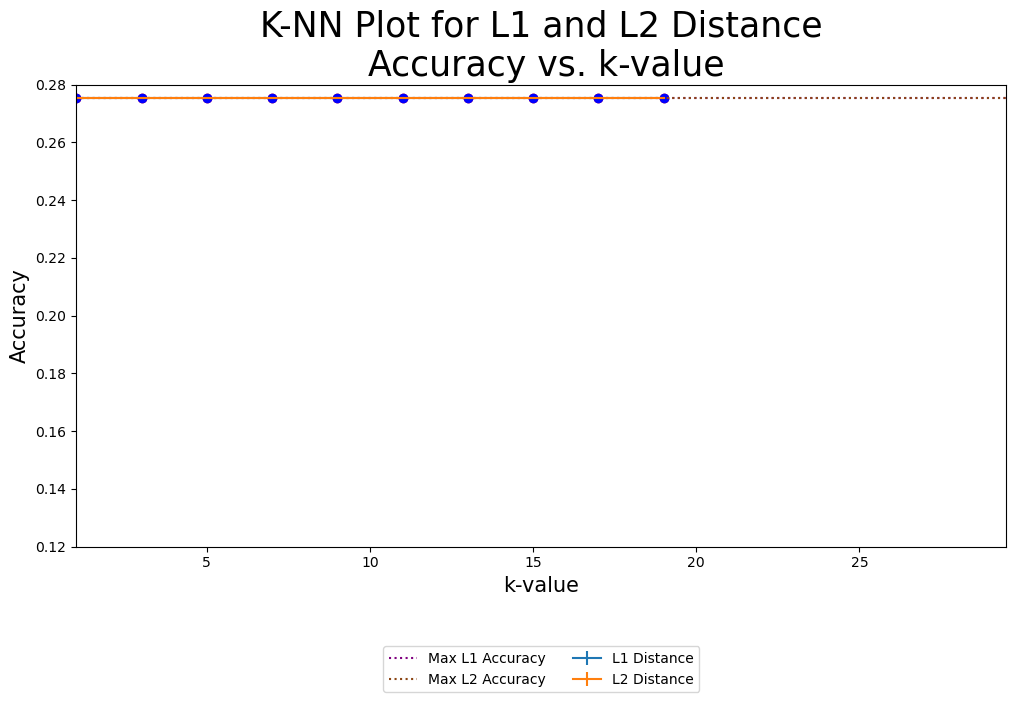

In [40]:
plt.figure(figsize=(12, 6)) 


plt.errorbar(range(1, k_max, 2)[:len(mean_accuracy_l1)], mean_accuracy_l1, yerr=sd_accuracy_l1, label="L1 Distance")
plt.errorbar(range(1, k_max, 2)[:len(mean_accuracy_l2)], mean_accuracy_l2, yerr=sd_accuracy_l2, label="L2 Distance")

plt.scatter(range(1, k_max,2)[:len(mean_accuracy_l1)],mean_accuracy_l1, color="red", marker="o")
plt.scatter(range(1, k_max,2) [:len(mean_accuracy_l2)], mean_accuracy_l2,color="blue", marker="o")

plt.xlabel("k-value", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("K-NN Plot for L1 and L2 Distance\n Accuracy vs. k-value", size=25, color="black")
plt.xlim(1, 29.5)  
plt.ylim(0.12, 0.28)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

max_accuracy_l1 = max(mean_accuracy_l1)
max_accuracy_l2 = max(mean_accuracy_l2)
plt.axhline(y=max_accuracy_l1, linestyle='dotted', color='purple', label='Max L1 Accuracy')
plt.axhline(y=max_accuracy_l2, linestyle='dotted', color='saddlebrown', label='Max L2 Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

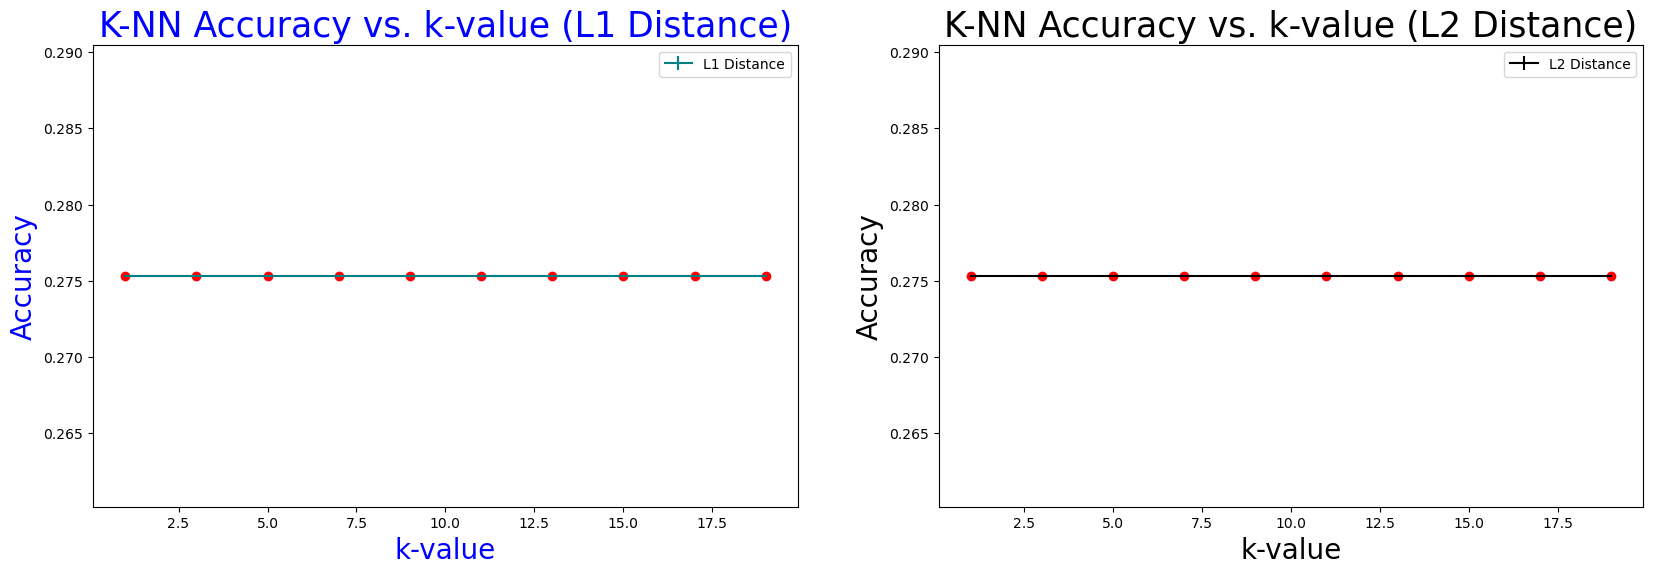

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for L1 distance
ax1.errorbar(range(1, k_max, 2)[:len(mean_accuracy_l1)], mean_accuracy_l1, yerr=sd_accuracy_l1, label="L1 Distance", color="teal")
ax1.scatter(range(1, k_max, 2)[:len(mean_accuracy_l1)], mean_accuracy_l1, color="red", marker="o")
ax1.set_xlabel("k-value", size=20, color="blue")
ax1.set_ylabel("Accuracy", size=20, color="blue")
ax1.set_title("K-NN Accuracy vs. k-value (L1 Distance)", size=25, color="blue")
ax1.legend()

# Plot for L2 distance_
ax2.errorbar(range(1, k_max, 2)[:len(mean_accuracy_l2)], mean_accuracy_l2, yerr=sd_accuracy_l2, label="L2 Distance", color="black")
ax2.scatter(range(1, k_max, 2)[:len(mean_accuracy_l2)], mean_accuracy_l2,color="red", marker="o")
ax2.set_xlabel("k-value", size=20, color="black")
ax2.set_ylabel("Accuracy", size=20, color="black")
ax2.set_title("K-NN Accuracy vs. k-value (L2 Distance)", size=25, color="black")
ax2.legend()

plt.show()

# Discussion

In this report, we analyze the performance of a k-Nearest Neighbors (K-NN) classification algorithm using two different distance metrics (L1 and L2 distances) for various values of k. We aim to provide insights into the observed discrepancies in the generated graphs.

One of the major issues was that our data might not have been aligning properly. We were trying to plot the accuracy of our K-Nearest Neighbors (K-NN) algorithm for both L1 and L2 distances, but it seemed like the data points and the x-values weren't exactly matching up. This misalignment might be why our graphs were a bit wonky.

To fix this, we tried to slice our x-values to match the length of our accuracy data.But it might not have been the best solution.

Another problem we faced was that our data might not have been consistent.That's a problem because our x-values should match our y-values, and that was a bit off.

We also needed to ensure that each data point matched the right x-value. If we're plotting the accuracy of L1 distance, it should be paired with the correct k-value. The same goes for L2 distance.

In the end, it's all part of the learning process. We're getting the hang of this, and next time, our graphs will be as accurate as our data.
